# Step 1: Data Wrangling

In [110]:
# importing required packages for data manipulation

import pandas as pd
import matplotlib.pyplot  as plt
import numpy as np
import seaborn as sns

### Dataset Description

The dataset for the remainder of this quiz is the Appliances Energy Prediction data. The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for 10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters. Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis (rp5.ru), and merged together with the experimental data sets using the date and time column. Two random variables have been included in the data set for testing the regression models and to filter out non predictive attributes (parameters). The attribute information can be seen below.

Attribute Information:

Date, time year-month-day hour:minute:second

Appliances, energy use in Wh

lights, energy use of light fixtures in the house in Wh

T1, Temperature in kitchen area, in Celsius

RH_1, Humidity in kitchen area, in %

T2, Temperature in living room area, in Celsius

RH_2, Humidity in living room area, in %

T3, Temperature in laundry room area

RH_3, Humidity in laundry room area, in %

T4, Temperature in office room, in Celsius

RH_4, Humidity in office room, in %

T5, Temperature in bathroom, in Celsius

RH_5, Humidity in bathroom, in %

T6, Temperature outside the building (north side), in Celsius

RH_6, Humidity outside the building (north side), in %

T7, Temperature in ironing room , in Celsius

RH_7, Humidity in ironing room, in %

T8, Temperature in teenager room 2, in Celsius

RH_8, Humidity in teenager room 2, in %

T9, Temperature in parents room, in Celsius

RH_9, Humidity in parents room, in %

To, Temperature outside (from Chievres weather station), in Celsius

Pressure (from Chievres weather station), in mm Hg

RH_out, Humidity outside (from Chievres weather station), in %

Wind speed (from Chievres weather station), in m/s

Visibility (from Chievres weather station), in km

Tdewpoint (from Chievres weather station), Â °C

rv1, Random variable 1, nondimensional

rv2, Random variable 2, nondimensional

To answer some questions, you will need to normalize the dataset using the MinMaxScaler after removing the following columns: [“date”, “lights”]. The target variable is “Appliances”. Use a 70-30 train-test set split with a  random state of 42 (for reproducibility). Run a multiple linear regression using the training set and evaluate your model on the test set.

In [111]:
# extending the number of viewable columns

pd.options.display.max_columns = 30

In [112]:
# loading the dataset
df = pd.read_csv('energydata_complete.csv', )
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [113]:
# dataset info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [114]:
# checking if there are missing values in the datset

df.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

From above we can conclude that there are no missing values in the dataset

# Exploratory Data Analysis

In [115]:
# descriptive summary of the data

df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,50.949283,7.910939,54.609083,20.267106,35.388200,22.029107,42.936165,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,9.022034,6.090347,31.149806,2.109993,5.114208,1.956162,5.224361,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,-6.065000,1.000000,15.390000,23.200000,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,45.400000,3.626667,30.025000,18.700000,31.500000,20.790000,39.066667,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,49.090000,7.300000,55.290000,20.033333,34.863333,22.100000,42.375000,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,53.663333,11.256000,83.226667,21.600000,39.000000,23.390000,46.536000,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,96.321667,28.290000,99.900000,26.000000,51.400000,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


**Obsevations**

* Temperature columns - Temperature inside the house varies between 14.89 Deg celcius & 29.85 Deg celscius, temperatire outside (T6) varies between -6.06 Deg to 28.29 Deg . The reason for this variation is sensors are kept outside the house.


* Humidiy columns - Humidity inside house varies is between 20.60% to 63.36% with exception of RH_5 (Bathroom) and RH_6 (Outside house) which varies between 29.82% to 96.32% and 1% to 99.9% respectively.


* Appliances - 75% of Appliance consumption is less than 100 Wh . With the maximum consumption of 1080 Wh , there will be outliers in this column and there are small number of cases where consumption is very high.


In [116]:
print(f'The number of rows is the dataset is {df.shape[0]} \nThe number of columns in the dataset is {df.shape[1]}')

The number of rows is the dataset is 19735 
The number of columns in the dataset is 29


## Data Visualization

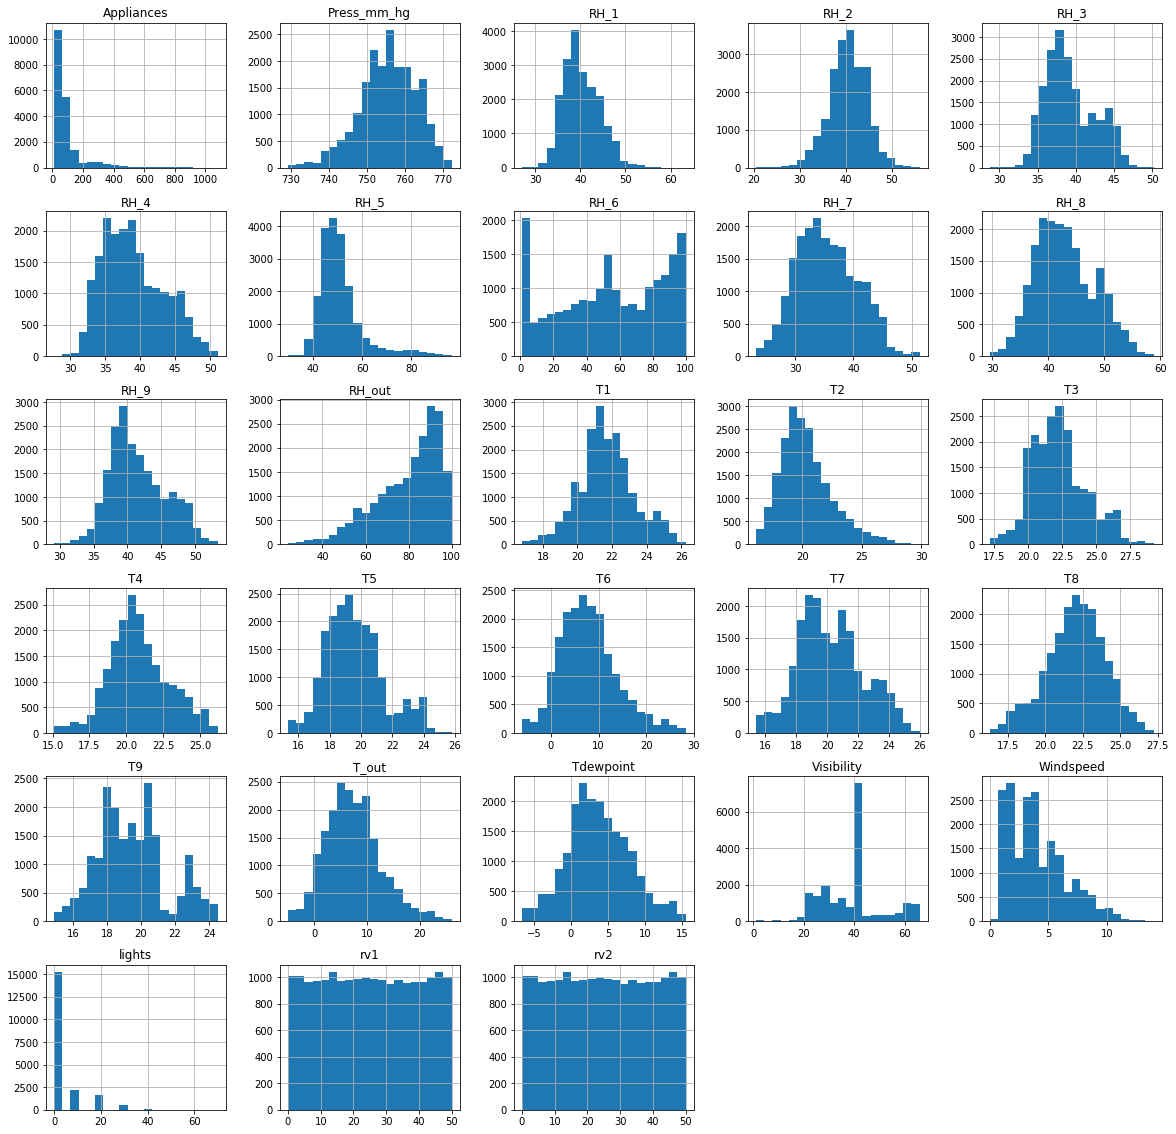

In [117]:
# lets visualize the histogram of all the features to understand the  distribution

df.hist(bins=20, figsize=(20,20));

**Observations**

* All humidity values except RH_6 and RH_out follow a Normal distribution. That is, all the readings from sensors inside the house are from a Normal distribution.

* Similarly, all temperature readings follow a Normal distribution except for T9.

* Out of the remaining columns, we can see that Visibility, Windspeed and Appliances are skewed.

* Also, there is no similarity between our target variable, Appliances and the remaining 24 columns. Windspeed looks similar but the number of observations are different as seen from the y-axes of both plots.

* Finally, the light histogram shows that the are more zero entries in the column, hence this column will be of no use, hence we can ignore it.

In [118]:
# dropping the lights column
df.drop(['lights'], axis=1,inplace=True)

# dropping the date column since its not a time series problem
df.drop(['date'], axis=1, inplace=True)

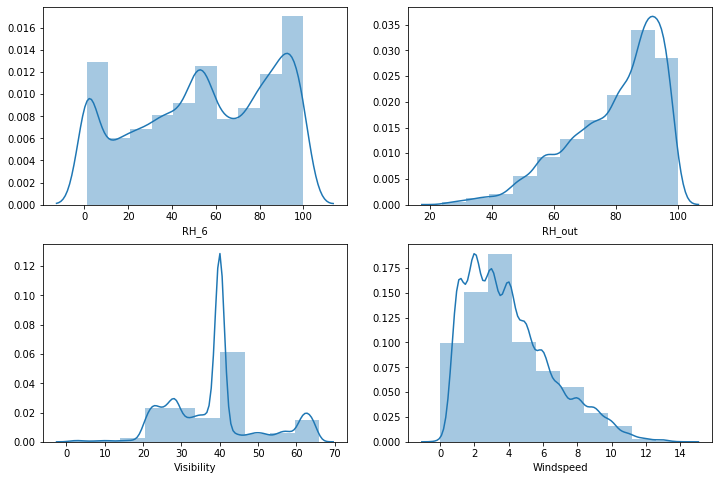

In [119]:
# focussed displots for RH_6 , RH_out , Visibility , Windspeed due to irregular distribution

fig, ax = plt.subplots(2,2,figsize=(12,8))
ax1 = sns.distplot(df["RH_6"],  bins=10, ax= ax[0][0])
ax2 = sns.distplot(df["RH_out"],bins=10, ax=ax[0][1])
ax3 = sns.distplot(df["Visibility"],bins=10, ax=ax[1][0])
ax4 = sns.distplot(df["Windspeed"],bins=10, ax=ax[1][1])

**Obervations**
* winspeed is positively skewed
* Visibility is negatively skwed
* RH_6, RH_out humidity sensors are not normally distributed, probably because there are placed outside the house

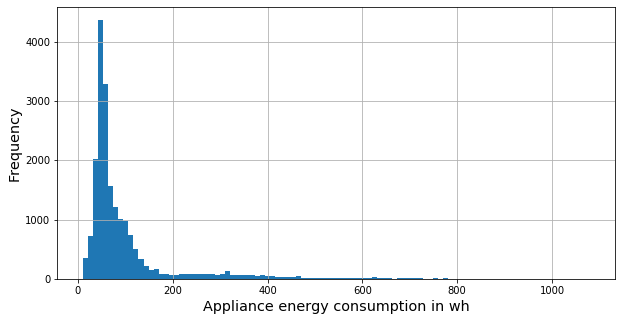

In [120]:
# lets take a closer look at the appliance column

df['Appliances'].hist(bins = 100, figsize=(10,5))
plt.xlabel('Appliance energy consumption in wh', fontsize='x-large')
plt.ylabel('Frequency', fontsize='x-large');

We can see from the above plot that most values are in the range of 0-200 Wh, confirming  our assumption that there are few cases of high energy consumption. The percentage of values within this range is calculated below.
This column is postively skewed , There are outliers in this column.

In [121]:
# calculating the percentage of appliance enegry consumption less than 200 wh

print(f" Percentage of the appliance energy consumption less than 200 Wh is: {round((df[df['Appliances'] <= 200]['Appliances'].count()) / len(df['Appliances']) * 100, 2)}%")

 Percentage of the appliance energy consumption less than 200 Wh is: 90.29%


## Correlation Plots

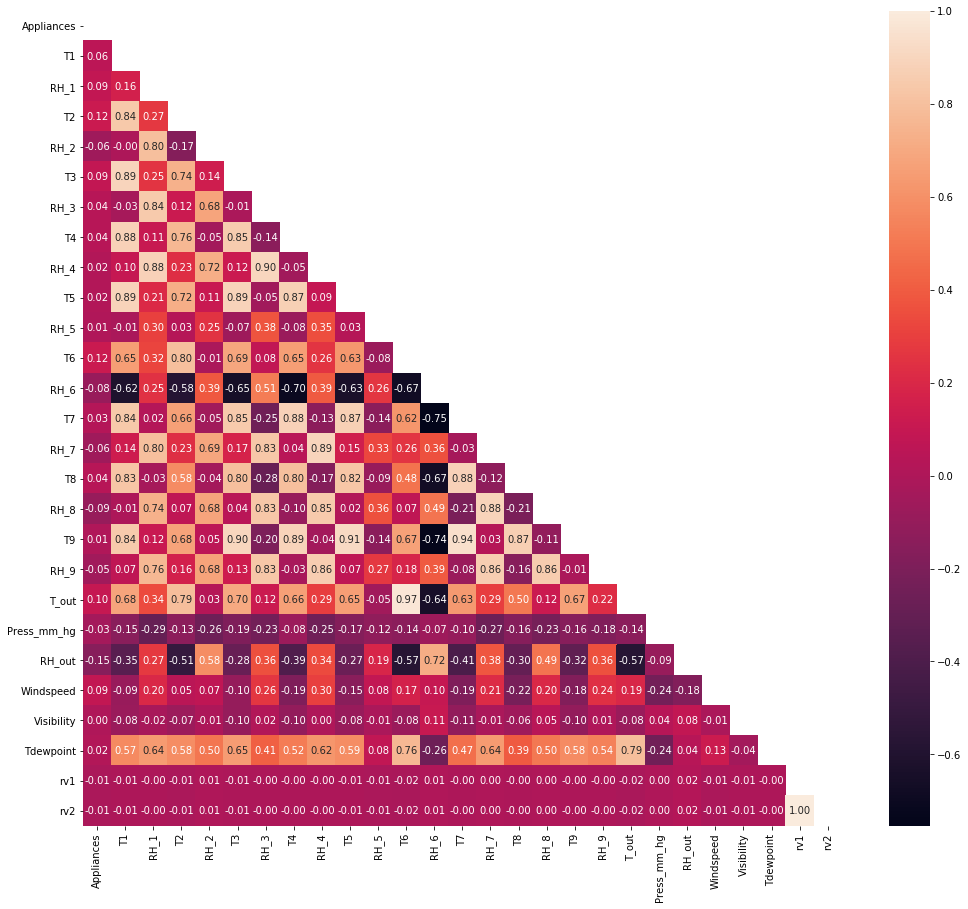

In [122]:
# Use the weather , temperature , applainces and random column to see the correlation

corr = df.corr()

# Mask the repeated values
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
  
fig = plt.figure(figsize=(17, 15))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, annot=True, fmt=".2f" , mask=mask);


In [123]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

# Function to get top correlations 

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df, 40))

Top Absolute Correlations
rv1   rv2      1.000000
T6    T_out    0.974787
T7    T9       0.944776
T5    T9       0.911055
T3    T9       0.901324
RH_3  RH_4     0.898978
RH_4  RH_7     0.894301
T1    T3       0.892402
T4    T9       0.889439
T3    T5       0.888169
T1    T5       0.885247
RH_7  RH_8     0.883984
T7    T8       0.882123
RH_1  RH_4     0.880359
T4    T7       0.877763
T1    T4       0.877001
T4    T5       0.871813
T5    T7       0.870624
T8    T9       0.869338
RH_7  RH_9     0.858686
RH_4  RH_9     0.856591
RH_8  RH_9     0.855812
T3    T4       0.852778
      T7       0.847374
RH_4  RH_8     0.847259
T1    T9       0.844777
RH_1  RH_3     0.844677
T1    T7       0.838705
      T2       0.836834
RH_3  RH_9     0.833538
      RH_7     0.832685
      RH_8     0.828822
T1    T8       0.825413
T5    T8       0.824981
T2    T6       0.801186
RH_1  RH_7     0.801122
      RH_2     0.797535
T4    T8       0.796256
T3    T8       0.795283
T2    T_out    0.792255
dtype: float64

In [16]:
# lets see how each features correlates with the target column
cor_matrix = df.corr()
cor_matrix['Appliances']

Appliances     1.000000
T1             0.055447
RH_1           0.086031
T2             0.120073
RH_2          -0.060465
T3             0.085060
RH_3           0.036292
T4             0.040281
RH_4           0.016965
T5             0.019760
RH_5           0.006955
T6             0.117638
RH_6          -0.083178
T7             0.025801
RH_7          -0.055642
T8             0.039572
RH_8          -0.094039
T9             0.010010
RH_9          -0.051462
T_out          0.099155
Press_mm_hg   -0.034885
RH_out        -0.152282
Windspeed      0.087122
Visibility     0.000230
Tdewpoint      0.015353
rv1           -0.011145
rv2           -0.011145
Name: Appliances, dtype: float64

**Observations from correlation plots**

* Temperature - All the temperature variables from T1-T9 and T_out have positive correlation with the target Appliances.


* Four columns have a high degree of correlation with T9 (T3,T5,T7,T8). Also T6 & T_Out has high correlation (both temperatures from outside) . Hence T6 & T9 can be removed from training set as information provided by them can be provided by other fields.


* Weather attributes - Visibility, Tdewpoint, Press_mm_hg have low correlation values


* Humidity - There are no significantly high correlation cases (> 0.9) for humidity sensors.


* The random varibles have no role to play



### Data preprocessing

In [124]:
# Due to the conclusions made above, lets drop the following columns, T9 and T6 from the dataset.

df.drop(['T9', 'T6', 'rv1', 'rv2'], axis=1, inplace=True)

In [125]:
# Applying MinMaxScaler to scale the features column 

from sklearn.preprocessing import MinMaxScaler

# instantiate the scaler
scaler = MinMaxScaler()

# normalizing the features
normalized_features = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [126]:
# splitting data into features(independent) and target(dependent) variables

# predictors
features = normalized_features.drop(['Appliances'], axis=1)

# target variable
target = normalized_features['Appliances']

In [127]:
# splitting data into training and testing set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 42)

In [128]:
print(f'shape of training set is {X_train.shape}')
print(f'shape of testing set is {X_test.shape}')

shape of training set is (13814, 22)
shape of testing set is (5921, 22)


# Modelling 

We will be looking at following Algorithms as improvements over the LinearRegressor model

**Linear models**
* LinearRegression
* ElasticNet

**Regularized Linear models as an improvement over Linear Regression.**

* Ridge Regression
* Lasso Regression

**Nearest neighbor regressor**
* KNeighborsRegressor

**Ensemble based Tree Regression models to deal robustly with outlier data and large number of features.**

* Random Forests
* Gradient Boosting
* Extra Trees
* DecisionTreeRegressor

In [129]:
# importing the required algorithms
from sklearn.linear_model import Ridge, Lasso, LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

# import the evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# create a dictionary of different algorithms 
models = {'Ridge': Ridge(),
        'Lasso': Lasso(),
        'ElasticNet':ElasticNet(),
        'LinearRegression':LinearRegression(),
        'KNeighborsRegressor':KNeighborsRegressor(),
        'RandomForestRegressor':RandomForestRegressor(),
        'ExtraTreesRegressor':ExtraTreesRegressor(),
        'GradientBoostingRegressor':GradientBoostingRegressor(),
        'DecisionTreeRegressor':DecisionTreeRegressor()}


In [130]:
# helper funtion to compute the score, RMSE, time on the training and testing set

def pipeline(models, X_train, X_test, y_train, y_test):
    """
    This function iteratively goes through all the models defined in the dictionary and 
    computes the Train_score, Test_score, MSE, MAE and RMSE.
    
    Parameters: model, training set(X_train), test_set(X_test), train_labels(y_train), and test_labels(y_test).
    
    Returns: This funtion returns a dataFrame containing calculations of each models and also plots bar
            chart showing how each models performs.
    """
    
    # store properties of each model
    prop = []
    
    # loop through the dictionary of models
    for reg_name, regressor in models.items():
        # empty dict for storing properties of each models
        reg_dict = {}
        # store the name of each model
        reg_dict['Name'] = reg_name
        # fit the regressor model
        regressor.fit(X_train, y_train)
        # compute the Train_score
        reg_dict['Train_score'] = regressor.score(X_train, y_train)
        # compute the test scores
        reg_dict['Test_score'] = regressor.score(X_test, y_test)
        # compute the mean_absolute_error
        reg_dict['MAE'] = mean_absolute_error(y_test, regressor.predict(X_test))
        #compute the mean_squared_error
        reg_dict['MSE'] = mean_squared_error(y_test, regressor.predict(X_test))
        # compute the RMSE
        reg_dict['RMSE'] = np.sqrt(mean_squared_error(y_test, regressor.predict(X_test)))
        # append the properties of a single regressor to the prop list
        prop.append(reg_dict)
     
    # create a dataframe with a list of all the model properties
    summary_df = pd.DataFrame(prop)
    
    # plot a bar chart to visualize the performance of each model
    summary_df.plot(x='Name', y=['Train_score', 'Test_score', 'MAE', 'MSE', 'RMSE'], kind='bar', figsize=(15,10),
               title='Performance scores of different models')
        
        
    return summary_df
        
        

,Name,Train_score,Test_score,MAE,MSE,RMSE
0,Ridge,0.133170,0.133595,0.050657,0.007797,0.088298
1,Lasso,0.000000,-0.000001,0.056523,0.008999,0.094862
2,ElasticNet,0.000000,-0.000001,0.056523,0.008999,0.094862
3,LinearRegression,0.133898,0.134637,0.050703,0.007787,0.088245
4,KNeighborsRegressor,0.667955,0.475049,0.032099,0.004724,0.068730
5,RandomForestRegressor,0.937577,0.562586,0.029515,0.003936,0.062739
6,ExtraTreesRegressor,1.000000,0.638611,0.026021,0.003252,0.057027
7,GradientBoostingRegressor,0.332337,0.238067,0.045359,0.006856,0.082803
8,DecisionTreeRegressor,1.000000,0.204066,0.035315,0.007162,0.084631


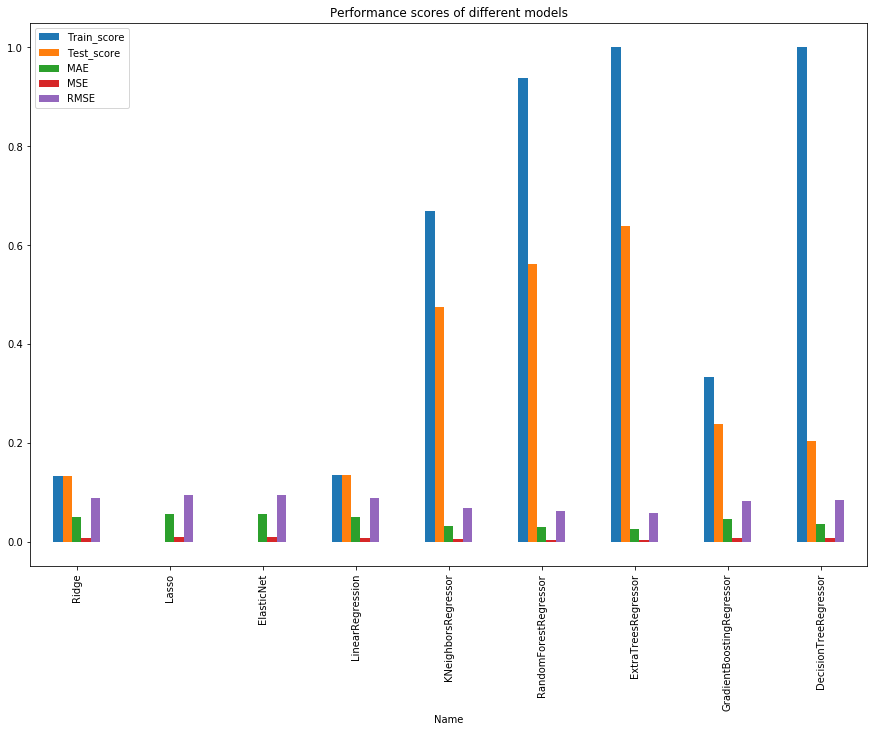

In [131]:
# execute the function
pipeline(models, X_train, X_test, y_train, y_test)

**Observaions**

From the plot above we conclude as follows

* Best performing model is ExtraTreeRegressor which has the lowest scores on evaluation metrics and the highest scores in training and testing set.

* Lasso regularization over Linear regression was the worst performing model.

* some algorithms have very high variance and low bias e.g(DecisionTreeRegressor).

* The RandomForestRegressor and ExtraTreeRegreesor seem to have a good balance between variance and bias.


### Hyperparameter Tunning

Lets tuned some hyperparameters to see if we can obtain a low ias and low varince of the RandomForesstRegressor and the ExtraTressRegressor. This would help our model not to overfit or underfit.

In [132]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# define the param grid
param_grid = [{
              'max_depth': [80, 150, 200,250],
              'n_estimators' : [10, 50, 100, 200, 250],
              'max_features': ["auto", "sqrt", "log2"]
            }]

reg = ExtraTreesRegressor(random_state=42)

# Instantiate the grid search model
grid_search = RandomizedSearchCV(reg, param_grid, cv = 6, n_jobs = -1 , scoring='r2' , verbose=2)

# fit the gridserch model
grid_search.fit(X_train, y_train)

Fitting 6 folds for each of 10 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  2.1min finished


RandomizedSearchCV(cv=6, error_score=nan,
                   estimator=ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0,
                                                 criterion='mse',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=None,
                                                 oob_score=False,
                         

In [133]:
# check for the best param fot the ExtraTreeReggressor

print(f'best param of the ExtraTreeRegressor is: {grid_search.best_params_}')

best param of the ExtraTreeRegressor is: {'n_estimators': 250, 'max_features': 'sqrt', 'max_depth': 250}


In [134]:
# Best possible estimator for ExtraTreesRegressor

best_model = grid_search.best_estimator_

print(f'print R2_score on training_set with tuned parameters: {best_model.score(X_train, y_train)}')
print(f'print R2_score on testing_set with tuned parameters: {round(best_model.score(X_test, y_test), 3)}')
print(f'print MSE_score on testing_set with tuned parameters: {round(mean_squared_error(y_test, best_model.predict(X_test)), 3)}')
print(f'print RMSE_score on testing_set with tuned parameters: {round(np.sqrt(mean_squared_error(y_test, best_model.predict(X_test))), 3)}')

print R2_score on training_set with tuned parameters: 1.0
print R2_score on testing_set with tuned parameters: 0.642
print MSE_score on testing_set with tuned parameters: 0.003
print RMSE_score on testing_set with tuned parameters: 0.057


From above, we can see that the tuned model was able to explain 64% of variance in the test set

### RandomForestRegressor HyperparameterTunning

In [135]:
# intantiate the grid params
param_grid = [
 {'n_estimators': [3, 10, 30, 50], 'max_features': [2, 4, 6, 8, 10],
  'max_depth':[10, 15]},
 {'bootstrap': [False], 'n_estimators': [1, 3, 10], 'max_features': [2, 3, 4]},
 ]

# instantiate the random forest regressor
forest_reg = RandomForestRegressor()

# instanntiate the grid serch
grid_search = GridSearchCV(forest_reg, param_grid, cv=6, scoring='r2')

# fit the grid serchon training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=6, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [136]:
# get best params
grid_search.best_params_

{'bootstrap': False, 'max_features': 4, 'n_estimators': 10}

In [137]:
# get best model
model = grid_search.best_estimator_

In [138]:
print(f'print R2_score on training_set with tuned parameters: {model.score(X_train, y_train)}')
print(f'print R2_score on testing_set with tuned parameters: {round(model.score(X_test, y_test), 3)}')
print(f'print MSE_score on testing_set with tuned parameters: {round(mean_squared_error(y_test, model.predict(X_test)), 3)}')
print(f'print RMSE_score on testing_set with tuned parameters: {round(np.sqrt(mean_squared_error(y_test, model.predict(X_test))), 3)}')

print R2_score on training_set with tuned parameters: 1.0
print R2_score on testing_set with tuned parameters: 0.581
print MSE_score on testing_set with tuned parameters: 0.004
print RMSE_score on testing_set with tuned parameters: 0.061


**Observations**

Based on parameter tunning step we can see that

* Best possible parameter combination are - 'bootsraps': Fasle, 'max_features': 4, 'n_estimators': 10
* Training set R2 score of 1.0 may be signal of overfitting on training set
* Test set R2 score is 0.58 improvement over 0.56 achieved using untuned model.
* Test set MSE score remains same as untuned model
* Test set RMSE score is 0.061 improvement over 0.63 achieved using untuned model.

## Feature Importance

In [139]:
# Get sorted list of features in order of importance
feature_indices = np.argsort(grid_search.best_estimator_.feature_importances_)


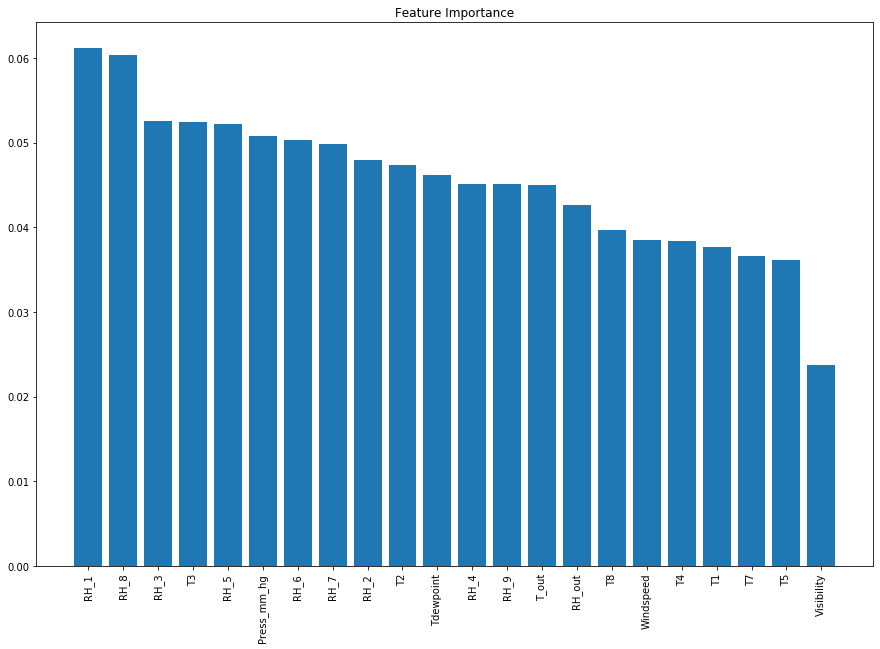

In [140]:
feature_importances = grid_search.best_estimator_.feature_importances_
indices = np.argsort(feature_importances)[::-1]
names = [X_train.columns[i] for i in indices]
# Create plot
plt.figure(figsize=(15, 10))

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X_train.shape[1]), feature_importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X_train.shape[1]), names, rotation=90)

# Show plot
plt.show()

In [141]:
# Get top 10 most important feature 
names[0:10]

['RH_1',
 'RH_8',
 'RH_3',
 'T3',
 'RH_5',
 'Press_mm_hg',
 'RH_6',
 'RH_7',
 'RH_2',
 'T2']

In [142]:
# Reduce test & training set to 10 feature set
train_important_feature = X_train[names[0:10]]
test_important_feature = X_test[names[0:10]]

In [143]:
# Clone the Gridsearch model with his parameter and fit on reduced dataset

from sklearn.base import clone
cloned_model = clone(grid_search.best_estimator_)
cloned_model.fit(train_important_feature , y_train)

RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=4, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [145]:
# Reduced dataset scores 

print('Training set R2 Score - ', r2_score(y_train, cloned_model.predict(train_important_feature)))
print('Testing set R2 Score - ', r2_score(y_test, cloned_model.predict(test_important_feature)))
print('Testing set RMSE Score - ', np.sqrt(mean_squared_error(y_test, cloned_model.predict(test_important_feature))))

Training set R2 Score -  1.0
Testing set R2 Score -  0.5373244657695481
Testing set RMSE Score -  0.06452505239661356


Observations
Based on parameter tunning step we can see that

* 10 most important features are - 'RH_1',
 'RH_8',
 'RH_3',
 'T3',
 'RH_5',
 'Press_mm_hg',
 'RH_6',
 'RH_7',
 'RH_2',
 'T2'


* As can be observed with R2 Score , compared to Tuned model 0.58 the R2 score has come down to 0.54.
The reduction in R2 score is high and we should not use reduced feature set for this data set.

### Conclusion

* The best Algorithm to use for this dataset ExtraTreeRegressor.

* The untuned model was able to explain 62% of variance on test set .

* The tuned model was able to explain 64% of varaince on test set which is improvement 2%.

* The final model had 22 features.

* Feature reduction was not able to add to better R2 score.